In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import random

In [2]:
dfdata = pd.read_csv('Brand_mobil_20102017.csv', parse_dates = ['Periode'], index_col = 'Periode')

In [3]:
dfdata.tail()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
Periode,,,,,,,
2017-09-01,27297.0,15507.0,15112.0,10934.0,9126.0,9720.0,87696.0
2017-10-01,30114.0,16760.0,17023.0,11831.0,9594.0,9111.0,94433.0
2017-11-01,28855.0,16360.0,15811.0,15291.0,11007.0,8867.0,96191.0
2017-12-01,23724.0,13028.0,15285.0,12775.0,10008.0,10278.0,85098.0
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dfdata.isna().head()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
Periode,,,,,,,
2010-01-01,False,False,False,False,False,False,False
2010-02-01,False,False,False,False,False,False,False
2010-03-01,False,False,False,False,False,False,False
2010-04-01,False,False,False,False,False,False,False
2010-05-01,False,False,False,False,False,False,False


In [5]:
dfdata.dropna(inplace = True)

In [6]:
dfdata.tail()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
Periode,,,,,,,
2017-08-01,34809.0,15821.0,17690.0,9185.0,10035.0,9716.0,97256.0
2017-09-01,27297.0,15507.0,15112.0,10934.0,9126.0,9720.0,87696.0
2017-10-01,30114.0,16760.0,17023.0,11831.0,9594.0,9111.0,94433.0
2017-11-01,28855.0,16360.0,15811.0,15291.0,11007.0,8867.0,96191.0
2017-12-01,23724.0,13028.0,15285.0,12775.0,10008.0,10278.0,85098.0


In [7]:
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2010-01-01 to 2017-12-01
Data columns (total 7 columns):
Toyota        96 non-null float64
Daihatsu      96 non-null float64
Honda         96 non-null float64
Mitsubishi    96 non-null float64
Suzuki        96 non-null float64
Others        96 non-null float64
Total         96 non-null float64
dtypes: float64(7)
memory usage: 6.0 KB


In [8]:
print('The data Time range from {} to {}'.format(dfdata.index.min(),dfdata.index.max()))

The data Time range from 2010-01-01 00:00:00 to 2017-12-01 00:00:00


## Data Preprocessing

In [9]:
tdata = dfdata[['Toyota','Daihatsu','Honda','Mitsubishi','Suzuki','Others']].resample('MS').mean()
tdata.head()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others
Periode,,,,,,
2010-01-01,20803.0,8302.0,3755.0,6855.0,4815.0,8301.0
2010-02-01,21800.0,7518.0,4431.0,8246.0,4638.0,9055.0
2010-03-01,26287.0,8084.0,5179.0,9068.0,6203.0,10734.0
2010-04-01,24422.0,9298.0,5154.0,9560.0,6013.0,10785.0
2010-05-01,21050.0,9485.0,4439.0,9544.0,6043.0,9959.0


In [10]:
td = dfdata['Suzuki'].resample('MS').mean()

C:\Users\GILANG\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


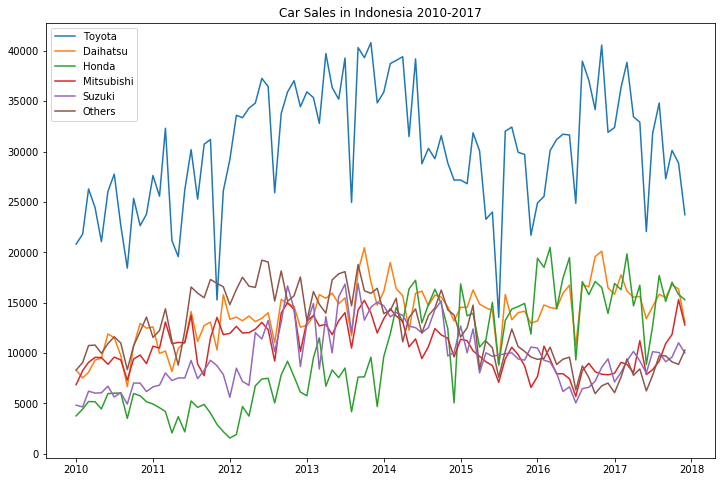

In [11]:
plt.figure(figsize = (12,8))
plt.title('Car Sales in Indonesia 2010-2017')

plt.plot(tdata['Toyota'], label = 'Toyota')
plt.plot(tdata['Daihatsu'], label = 'Daihatsu')
plt.plot(tdata['Honda'], label = 'Honda')
plt.plot(tdata['Mitsubishi'], label = 'Mitsubishi')
plt.plot(tdata['Suzuki'], label = 'Suzuki')
plt.plot(tdata['Others'], label = 'Others')
plt.legend()
plt.show()

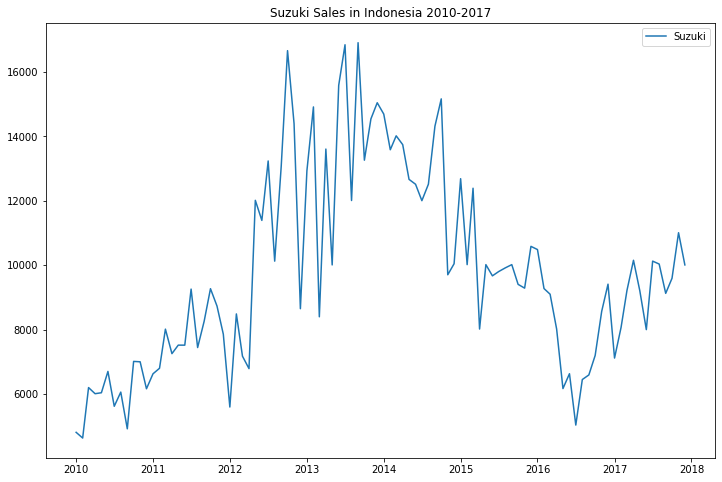

In [12]:
plt.figure(figsize = (12,8))
plt.title('Suzuki Sales in Indonesia 2010-2017')
plt.plot(tdata['Suzuki'], label = 'Suzuki')
plt.legend()
plt.show()

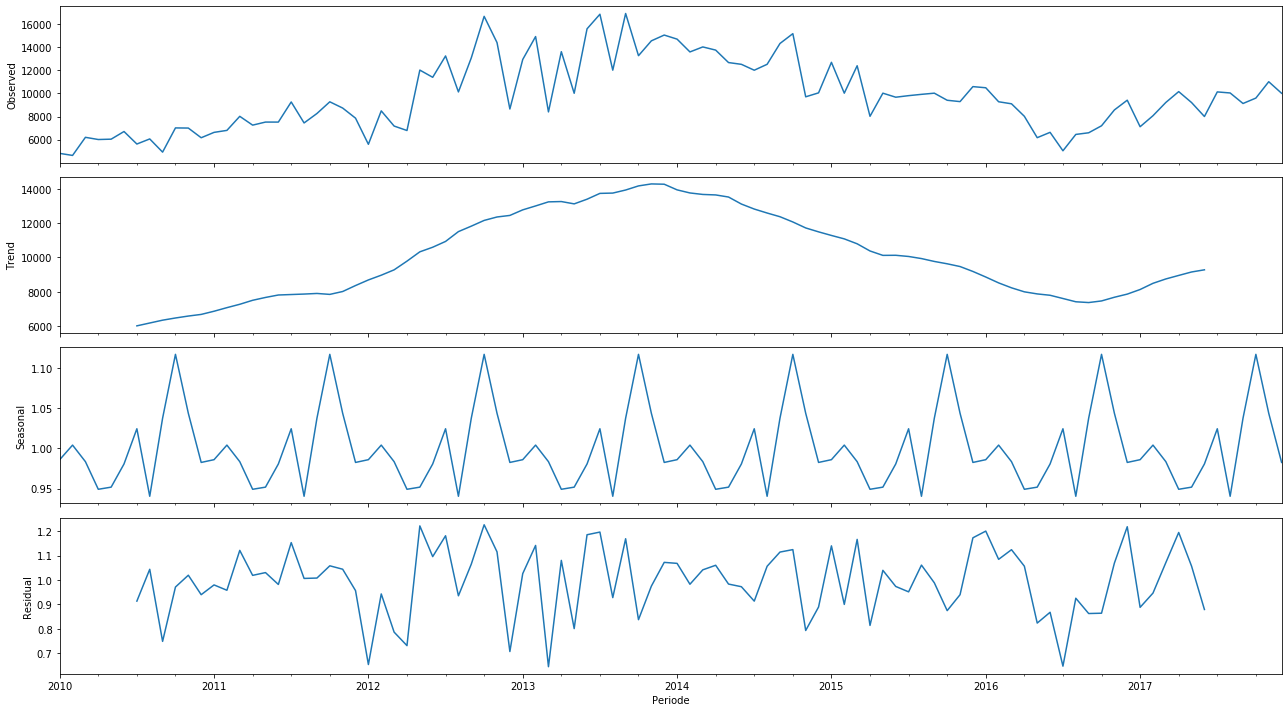

In [13]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(td, model='multipicative')
fig = decomposition.plot()
plt.show()

In [14]:
decomposition.seasonal.head(10)

Periode
2010-01-01    0.985939
2010-02-01    1.004020
2010-03-01    0.983472
2010-04-01    0.949203
2010-05-01    0.951857
2010-06-01    0.980613
2010-07-01    1.024300
2010-08-01    0.940521
2010-09-01    1.037392
2010-10-01    1.116640
Freq: MS, Name: Suzuki, dtype: float64

In [15]:
decomposition.resid.head(10)

Periode
2010-01-01         NaN
2010-02-01         NaN
2010-03-01         NaN
2010-04-01         NaN
2010-05-01         NaN
2010-06-01         NaN
2010-07-01    0.913443
2010-08-01    1.043857
2010-09-01    0.748510
2010-10-01    0.971187
Freq: MS, Name: Suzuki, dtype: float64

Made per DataFrame

In [16]:
dftoyota = dfdata['Toyota']
dftoyota.head()

dfdaihatsu = dfdata['Daihatsu']
dfdaihatsu.head()

dfhonda = dfdata['Honda']
dfhonda.head()

dfmitsubishi = dfdata['Mitsubishi']
dfmitsubishi.head()

dfsuzuki = dfdata['Suzuki']
dfsuzuki.head()

dfothers = dfdata['Others']
dfothers.head()

dftoyota.head()
dfdaihatsu.head()
dfhonda.head()
dfmitsubishi.head()
dfsuzuki.head()
dfothers.head()

Periode
2010-01-01     8301.0
2010-02-01     9055.0
2010-03-01    10734.0
2010-04-01    10785.0
2010-05-01     9959.0
Name: Others, dtype: float64

Dickey-Fuller Test

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
dfcar_brand = [dftoyota,dfdaihatsu,dfhonda,dfmitsubishi,dfsuzuki,dfothers]
dfname = ['Toyota :', 'Daihatsu :','Honda :','Mitsubishi :', 'Suzuki :','Others :']

In [19]:
for index, i in enumerate(dfcar_brand):
    result = adfuller(i)
    print(dfname[index])
    print('ADF Statistic:{}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    
    #all data non statisioner, need diferensiation ( danta > o,o5 )

Toyota :
ADF Statistic:-2.7038963342563753
p-value: 0.07336645650211786
Daihatsu :
ADF Statistic:-2.5512394982040516
p-value: 0.10349954448917553
Honda :
ADF Statistic:-0.7472288279341994
p-value: 0.8341341321905049
Mitsubishi :
ADF Statistic:-1.799449654505583
p-value: 0.3807349590833119
Suzuki :
ADF Statistic:-1.9043213510014503
p-value: 0.3300309496726761
Others :
ADF Statistic:-1.1290154724704395
p-value: 0.7033632852005766


## Differencing

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

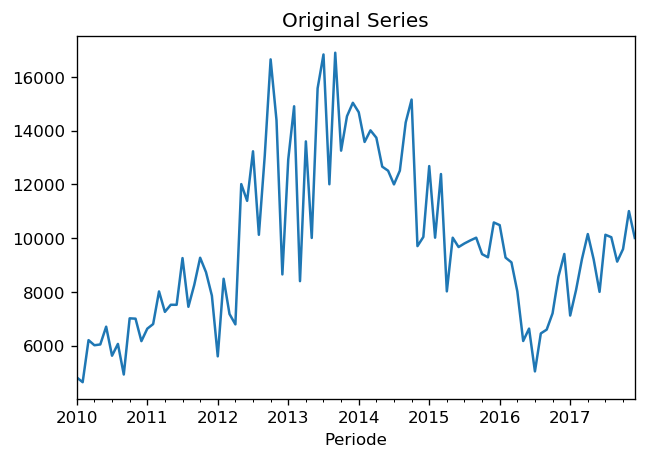

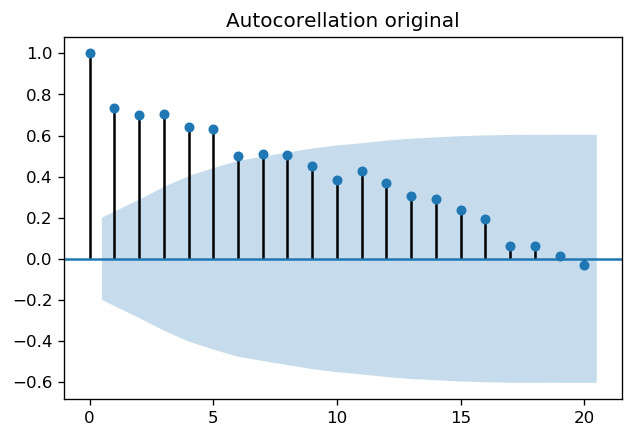

In [21]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})

# Original Series
ori = dfsuzuki.plot()
ori.set_title('Original Series')
plot_acf(dfsuzuki, title = 'Autocorellation original')

plt.show()

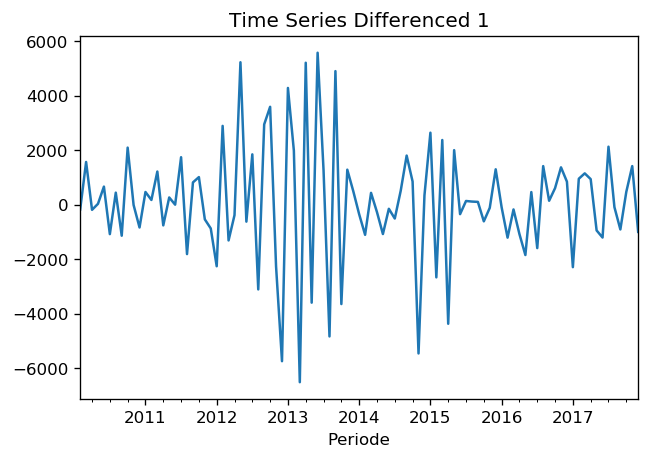

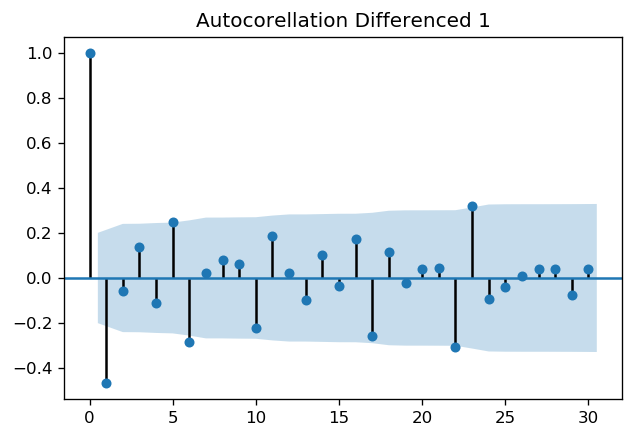

ADF Statistic:-3.9995772623843693
p-value: 0.0014127264495155563


In [22]:
# Differencing 1
diff1 = dfsuzuki.diff().dropna().plot()
diff1.set_title('Time Series Differenced 1')
plot_acf(dfsuzuki.diff().dropna(),lags =30,  title = 'Autocorellation Differenced 1')
plt.show()

#Dif  1
result = adfuller(dfsuzuki.diff().dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

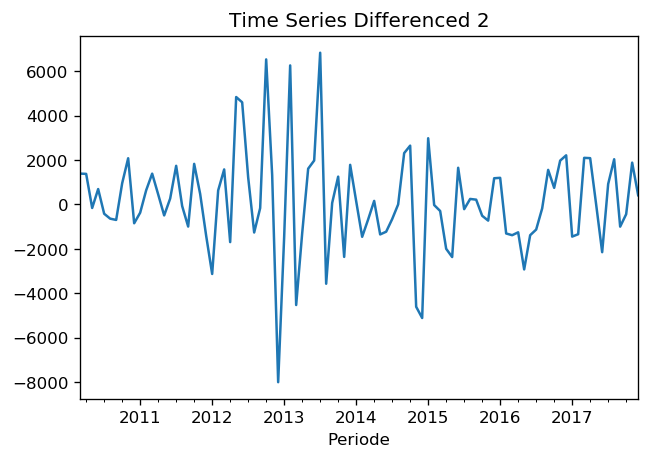

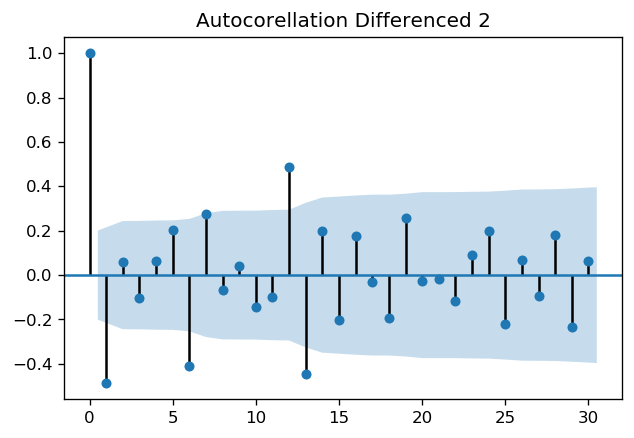

ADF Statistic:-4.616653450853275
p-value: 0.00012034159720427082


In [23]:
# Differencing 
diff13 = dfsuzuki.diff(2).dropna().plot()
diff13.set_title('Time Series Differenced 2')
plot_acf(dfhonda.diff().dropna(),lags =30,  title = 'Autocorellation Differenced 2')
plt.show()

#Dif 2
result = adfuller(dfsuzuki.diff(2).dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

In [24]:
print('Original S')
result = adfuller(dfsuzuki.dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('\n')

#Dif 1
print('Dif 1')
result = adfuller(dfsuzuki.diff().dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('\n')

#Dif 2
print('Dif 2')
result = adfuller(dfsuzuki.diff(2).dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))


Original S
ADF Statistic:-1.9043213510014503
p-value: 0.3300309496726761


Dif 1
ADF Statistic:-3.9995772623843693
p-value: 0.0014127264495155563


Dif 2
ADF Statistic:-4.616653450853275
p-value: 0.00012034159720427082


Data yang akan di gunakan ada lah Diff 1, karena p-value berada di bawah 0.05, setelah di dif 2 maka semakin rendah p-value. namun cukup dengan dif 1

In [25]:
S_difference_1 = dfsuzuki.diff().dropna()

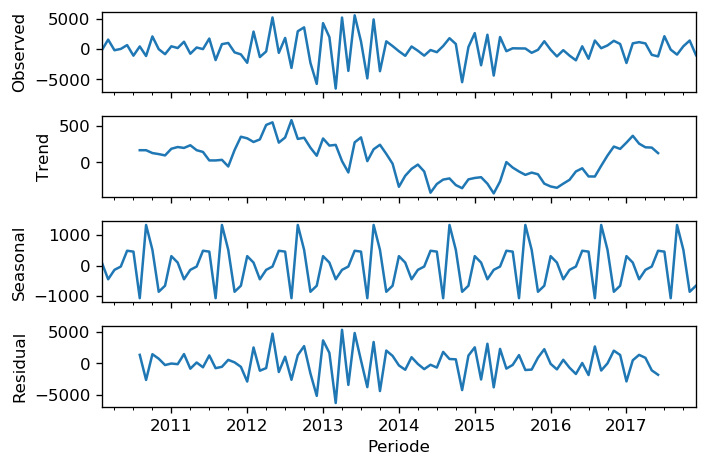

In [26]:
#yang akan digunakanadalah model Additive karena plot terlihat seperti mengikuti addition model
S_decomposition_difference_1 = sm.tsa.seasonal_decompose(S_difference_1, model='additive') 
fig = S_decomposition_difference_1.plot()
plt.show()

In [27]:
S_deseason = S_difference_1/ S_decomposition_difference_1.seasonal

In [28]:
S_decomposition_difference_1.seasonal.tail()

Periode
2017-08-01   -1068.338128
2017-09-01    1332.298776
2017-10-01     517.513062
2017-11-01    -858.100033
2017-12-01    -659.754795
Name: Suzuki, dtype: float64

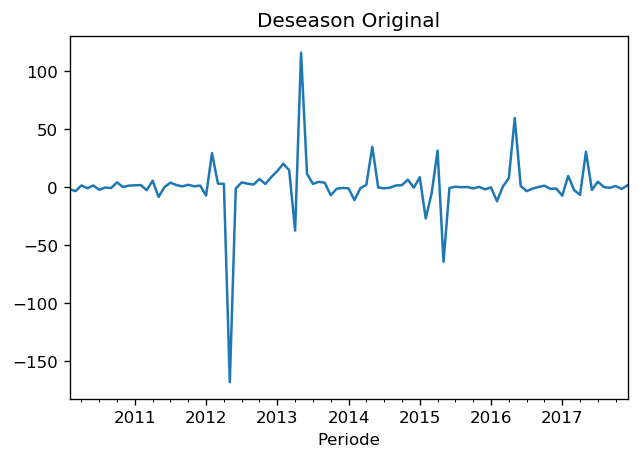

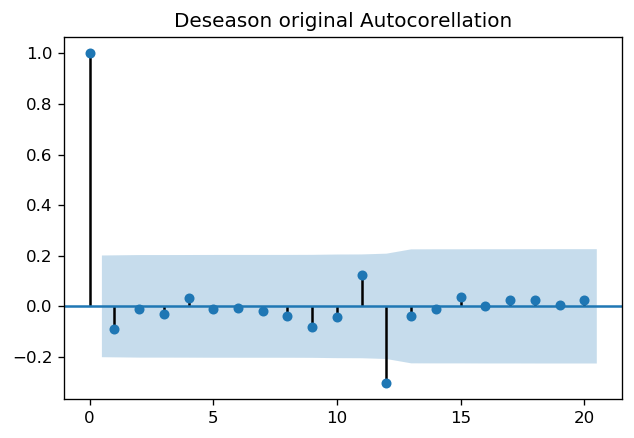

In [29]:
#Deseason original
S_ori_deseason = S_deseason.plot()
S_ori_deseason.set_title('Deseason Original')
plot_acf(S_deseason, title = 'Deseason original Autocorellation')

plt.show()

In [30]:
result = adfuller(S_deseason)
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

ADF Statistic:-10.50805087309111
p-value: 1.0417877935432476e-18


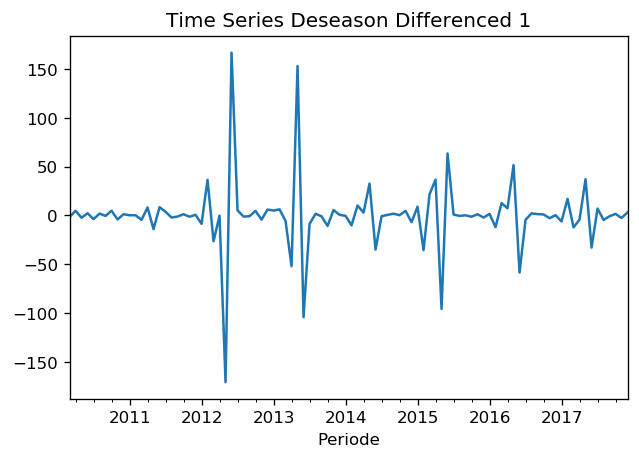

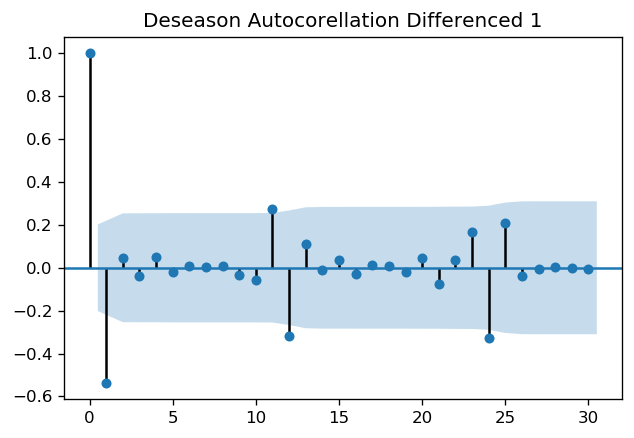

In [31]:
# 1st Differencing
diff1_deseason = S_deseason.diff().dropna().plot()
diff1_deseason.set_title('Time Series Deseason Differenced 1')
plot_acf(S_deseason.diff().dropna(),lags = 30, title = 'Deseason Autocorellation Differenced 1')

plt.show()

In [32]:
result = adfuller(S_deseason.diff().dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

ADF Statistic:-7.198651525375404
p-value: 2.3974407672612255e-10


C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


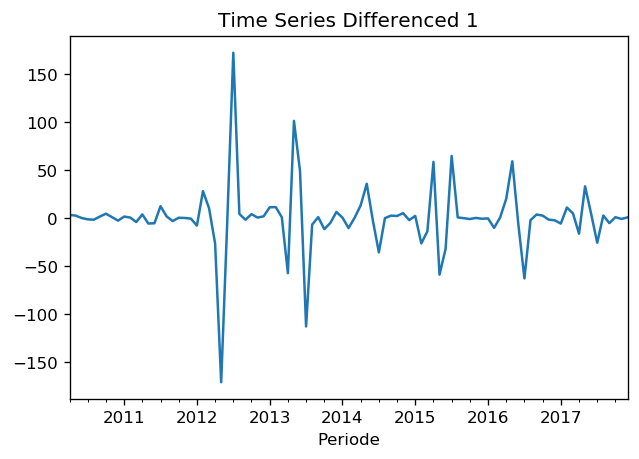

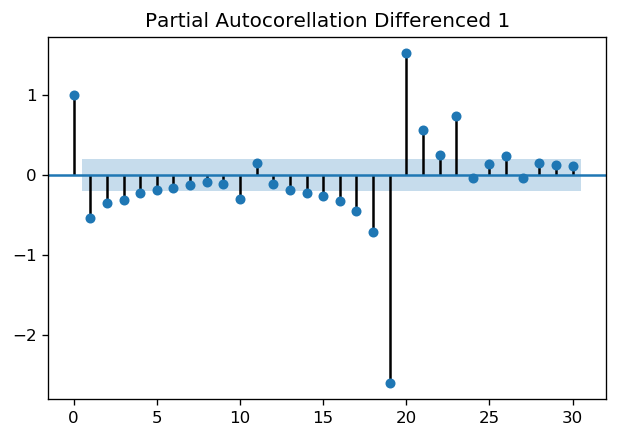

In [33]:
#PACF
diff1 = S_deseason.diff(2).dropna().plot()
diff1.set_title('Time Series Differenced 1')
plot_pacf(S_deseason.diff().dropna(), lags = 30, title = 'Partial Autocorellation Differenced 1')

plt.show()

## ARIMA

In [34]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(S_deseason,order =(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.Suzuki   No. Observations:                   94
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -436.741
Method:                       css-mle   S.D. of innovations             24.585
Date:                Wed, 20 Nov 2019   AIC                            881.482
Time:                        07:02:39   BIC                            891.655
Sample:                    03-01-2010   HQIC                           885.591
                         - 12-01-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0380      0.085      0.446      0.657      -0.129       0.205
ar.L1.D.Suzuki    -0.0823      0.103     -0.802      0.424      -0.283       0.119
ma.L1.D.Suzuki    -1.0000      0.030

C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


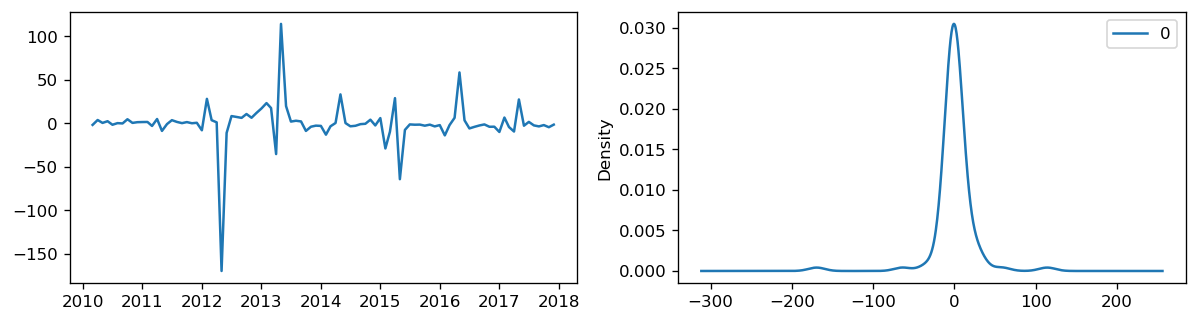

In [35]:
plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
ax[0].plot(residuals.index, residuals.values)
residuals.plot.kde( ax=ax[1])


plt.show()

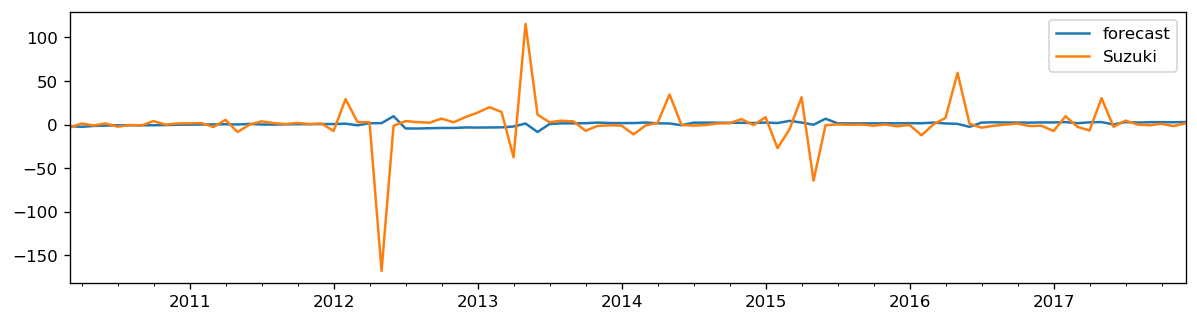

In [36]:
model_fit.plot_predict(dynamic=False)
plt.show()

Validation

C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


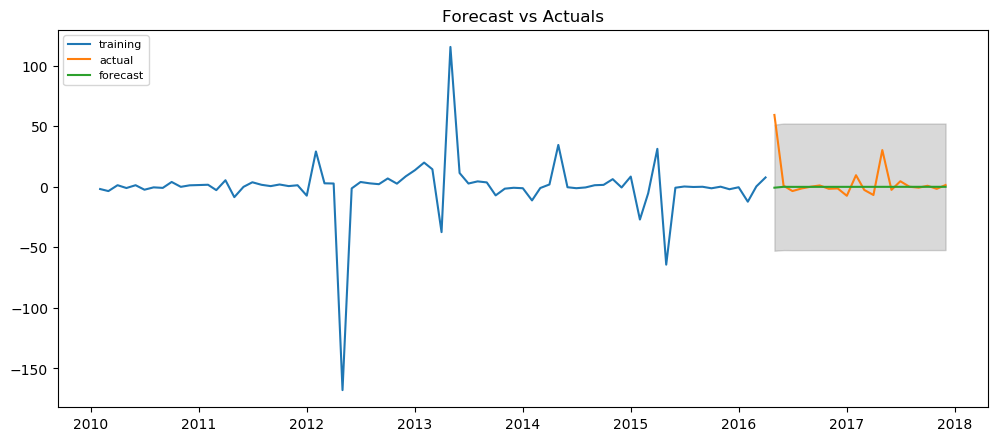

In [37]:
train = S_deseason[:75]
test = S_deseason[75:]
n_periods = 24

model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast (resulted in forecast, standard error, and confidence interval)
fc, se, conf = fitted.forecast(20, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [38]:
#Auto pd.arima
import pmdarima as pm

model = pm.auto_arima(S_deseason, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series (1 as monthly)
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

C:\Users\GILANG\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\GILANG\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Fit ARIMA: order=(1, 0, 1); AIC=885.143, BIC=895.358, Fit time=0.128 seconds
Fit ARIMA: order=(0, 0, 0); AIC=881.985, BIC=887.092, Fit time=0.004 seconds
Fit ARIMA: order=(1, 0, 0); AIC=883.204, BIC=890.865, Fit time=0.039 seconds
Fit ARIMA: order=(0, 0, 1); AIC=883.176, BIC=890.838, Fit time=0.029 seconds
Total fit time: 0.207 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   95
Model:                     ARMA(0, 0)   Log Likelihood                -438.992
Method:                           css   S.D. of innovations             24.582
Date:                Wed, 20 Nov 2019   AIC                            881.985
Time:                        07:02:41   BIC                            887.092
Sample:                             0   HQIC                           884.048
                                                                              
                 coef    std e

In [39]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
  
    return({'mape':mape,'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test)

{'mape': 0.9819019199520136,
 'corr': -0.844889249596357,
 'minmax': 99.05024155246069}

## SARIMA (Seasonal ARIMA)

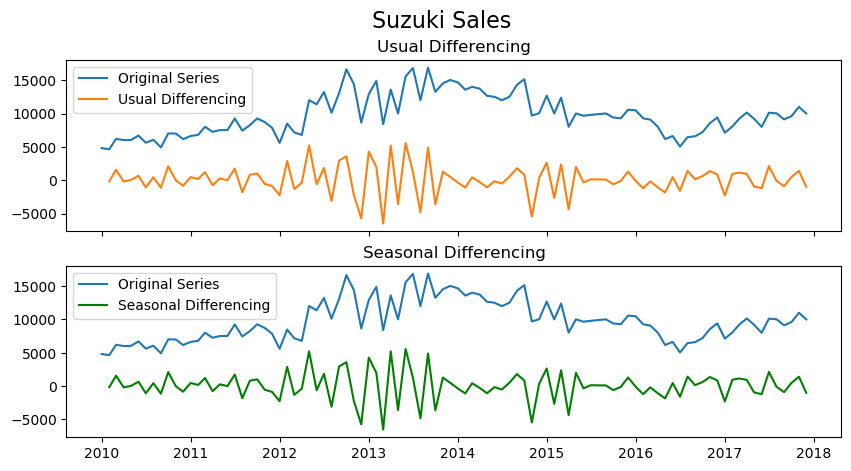

In [40]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(dfsuzuki, label='Original Series')
axes[0].plot(dfsuzuki.diff(), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasonal Differencing
axes[1].plot(dfsuzuki, label='Original Series')
axes[1].plot(dfsuzuki.diff(), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Suzuki Sales', fontsize=16)
plt.show()

In [41]:
import pmdarima as pm
model = pm.auto_arima(dfsuzuki, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # with Seasonality
                      start_P=0, 
                      start_Q = 0, 
                      D=1,            #Determine the Seasonal Difference as 1
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1579.891, BIC=1584.729, Fit time=0.027 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1540.735, BIC=1550.410, Fit time=0.453 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1513.530, BIC=1523.205, Fit time=1.257 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1514.686, BIC=1526.780, Fit time=1.507 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1544.016, BIC=1551.273, Fit time=0.077 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1514.598, BIC=1526.692, Fit time=3.167 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1527.758, BIC=1542.272, Fit time=4.208 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1514.953, BIC=1527.047, Fit time=1.524 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1541.815, BIC=1549.071, Fit time=0.755 seconds
Fit ARIMA: order=(0, 1, 2) s

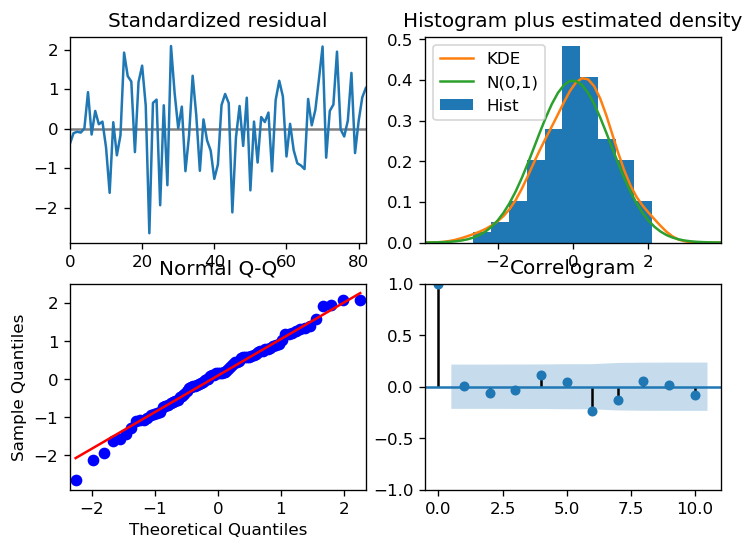

In [42]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

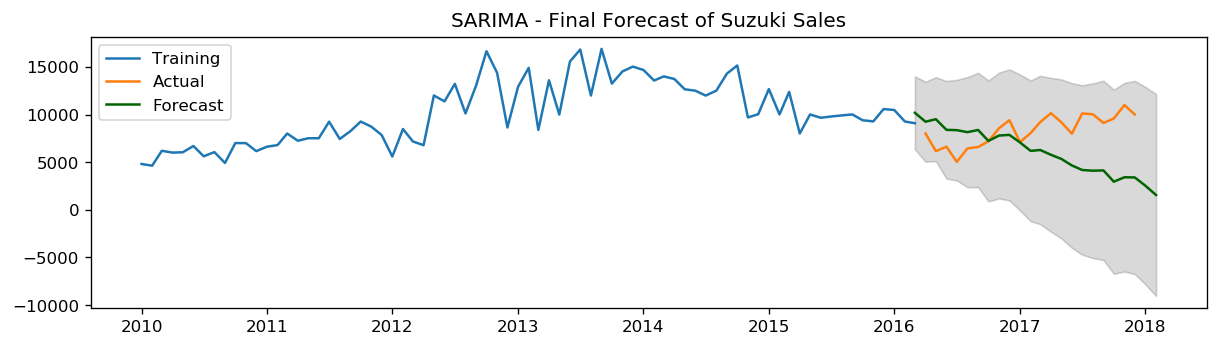

In [43]:
n_periods = 24
train = dfsuzuki[:75]
test = dfsuzuki[75:]

fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True) #Return the Confidence Interval
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train, label ='Training')
plt.plot(test, label = 'Actual')
plt.plot(fitted_series, color='darkgreen', label ='Forecast')
plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Suzuki Sales")
plt.show()

In [44]:
# forecast_accuracy(fc, test)

## SARIMAX

In [45]:
result_mul = sm.tsa.seasonal_decompose(dfsuzuki[-24:],   # 24 last months
                                model='multiplicative', 
                                extrapolate_trend='freq')

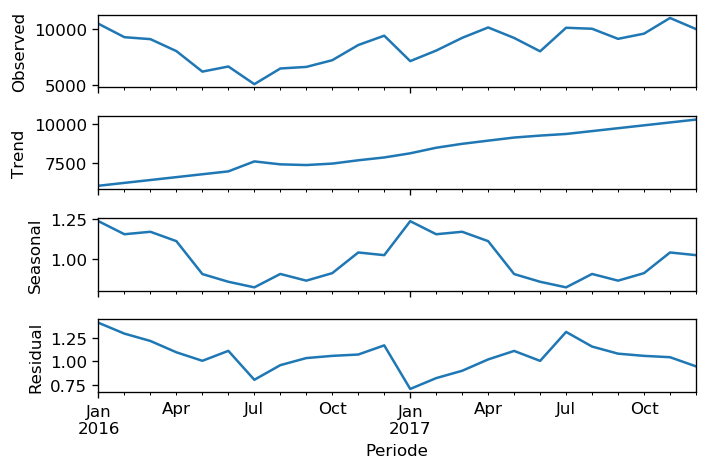

In [46]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})
fig = result_mul.plot()
plt.show()

In [47]:
seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

In [48]:
dfsuzuki = pd.DataFrame(dfsuzuki)
dfsuzuki['month'] = dfsuzuki.index.month
dfS = pd.merge(dfsuzuki, seasonal_index, how='left', on='month')
dfS.columns = ['Suzuki_sales_value_average', 'month', 'seasonal_index']
dfS.index = dfhonda.index  # reassign the index.

In [49]:
dfS.head()

,Suzuki_sales_value_average,month,seasonal_index
Periode,,,
2010-01-01,4815.0,1,1.235333
2010-02-01,4638.0,2,1.153904
2010-03-01,6203.0,3,1.169215
2010-04-01,6013.0,4,1.110707
2010-05-01,6043.0,5,0.905505


In [50]:

smaxmodel = pm.auto_arima(dfS[['Suzuki_sales_value_average']], exogenous=dfS[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

smaxmodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1537.514, BIC=1552.098, Fit time=1.336 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=1604.043, BIC=1611.336, Fit time=0.022 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=1574.481, BIC=1586.635, Fit time=0.242 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1593.718, BIC=1605.872, Fit time=0.296 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=1544.466, BIC=1561.481, Fit time=1.470 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=1564.580, BIC=1576.735, Fit time=0.176 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 2, 12); AIC=1539.435, BIC=1556.450, Fit time=3.292 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=1545.994, BIC=1565.441, Fit time=3.352 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1542.398, BIC=1559.414, Fit time=1.253 seconds
Fit ARIMA: order=(1, 0, 0) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -762.757
Date:                            Wed, 20 Nov 2019   AIC                           1537.514
Time:                                    07:03:50   BIC                           1552.098
Sample:                                         0   HQIC                          1543.377
                                             - 96                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     18.3769     40.801      0.450      0.652     -61.591      98.345
x1            23.8308   2890.336      0.008      0.993   -5641.123    5688.785
ar.L1          0.9746      0.034     29.058      0.000       0.909       1.040
ma.L1         -0.5865      0.100     -5.894      0.000      -0.781      -0.391
ma.S.L12      -0.8741      0.202     -4.327      0.000      -1.270      -0.478
sigma2      3.767e+06      1.935   1.95e+06      0.000    3.77e+06    3.77e+06
===================================================================================
Ljung-Box (Q):                       53.62   Jarque-Bera (JB):                 0.66
Prob(Q):                              0.07   Prob(JB):                         0.72
Heteroskedasticity (H):               0.50   Skew:                            -0.09
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.74e+22. Standard errors may be unstable.
"""

In [51]:
seasonal_index

,Suzuki,month
Periode,,
2017-01-01,1.235333,1
2017-02-01,1.153904,2
2017-03-01,1.169215,3
2017-04-01,1.110707,4
2017-05-01,0.905505,5
2017-06-01,0.857393,6
2017-07-01,0.822568,7
2017-08-01,0.906188,8
2017-09-01,0.864355,9


SARIMAX done..
forcast next 24month

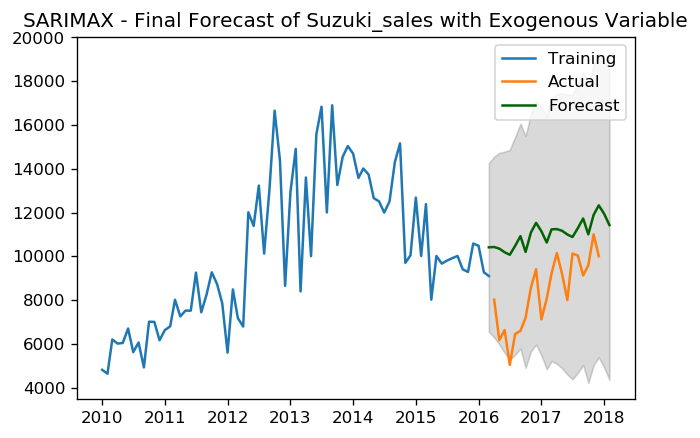

In [52]:
train = dfS[:75]
test = dfS[75:]
n_periods = 24

fitted, confint = smaxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index['Suzuki'], 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train['Suzuki_sales_value_average'], label ='Training')
plt.plot(test['Suzuki_sales_value_average'], label = 'Actual')
plt.plot(fitted_series, color='darkgreen', label ='Forecast')
plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX - Final Forecast of Suzuki_sales with Exogenous Variable")
plt.show()

## Prophet

In [53]:
test = dfsuzuki.copy()

In [54]:
test.drop('month', axis = 1, inplace = True)

In [55]:
test.reset_index(inplace=True)

In [56]:
prediction_size = 7
train_df = test[:-prediction_size]

In [57]:
from fbprophet import Prophet 
m = Prophet()

In [58]:
train_df.columns = ['ds','y']
train_df.head()

,ds,y
0,2010-01-01,4815.0
1,2010-02-01,4638.0
2,2010-03-01,6203.0
3,2010-04-01,6013.0
4,2010-05-01,6043.0


In [59]:
m.fit(train_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [60]:
future = m.make_future_dataframe(periods=prediction_size, freq='M')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,4569.627426,2963.612746,7245.926804,4569.627426,4569.627426,554.550414,554.550414,554.550414,554.550414,554.550414,554.550414,0.0,0.0,0.0,5124.177840
1,2010-02-01,4763.766771,3426.385877,7749.011844,4763.766771,4763.766771,827.618447,827.618447,827.618447,827.618447,827.618447,827.618447,0.0,0.0,0.0,5591.385219
2,2010-03-01,4939.118438,3544.124074,8029.715688,4939.118438,4939.118438,779.908786,779.908786,779.908786,779.908786,779.908786,779.908786,0.0,0.0,0.0,5719.027224
3,2010-04-01,5133.257783,2821.028552,7357.940141,5133.257783,5133.257783,111.852640,111.852640,111.852640,111.852640,111.852640,111.852640,0.0,0.0,0.0,5245.110423
4,2010-05-01,5321.134569,3182.578637,7405.327207,5321.134569,5321.134569,50.871266,50.871266,50.871266,50.871266,50.871266,50.871266,0.0,0.0,0.0,5372.005834


In [61]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,4569.627426,2963.612746,7245.926804,4569.627426,4569.627426,554.550414,554.550414,554.550414,554.550414,554.550414,554.550414,0.0,0.0,0.0,5124.177840
1,2010-02-01,4763.766771,3426.385877,7749.011844,4763.766771,4763.766771,827.618447,827.618447,827.618447,827.618447,827.618447,827.618447,0.0,0.0,0.0,5591.385219
2,2010-03-01,4939.118438,3544.124074,8029.715688,4939.118438,4939.118438,779.908786,779.908786,779.908786,779.908786,779.908786,779.908786,0.0,0.0,0.0,5719.027224
3,2010-04-01,5133.257783,2821.028552,7357.940141,5133.257783,5133.257783,111.852640,111.852640,111.852640,111.852640,111.852640,111.852640,0.0,0.0,0.0,5245.110423
4,2010-05-01,5321.134569,3182.578637,7405.327207,5321.134569,5321.134569,50.871266,50.871266,50.871266,50.871266,50.871266,50.871266,0.0,0.0,0.0,5372.005834
5,2010-06-01,5515.273914,3737.964035,8261.915359,5515.273914,5515.273914,477.950132,477.950132,477.950132,477.950132,477.950132,477.950132,0.0,0.0,0.0,5993.224046
6,2010-07-01,5703.150699,4337.287836,8708.192344,5703.150699,5703.150699,774.053407,774.053407,774.053407,774.053407,774.053407,774.053407,0.0,0.0,0.0,6477.204107
7,2010-08-01,5897.290045,3737.081244,8057.392351,5897.290045,5897.290045,-46.013776,-46.013776,-46.013776,-46.013776,-46.013776,-46.013776,0.0,0.0,0.0,5851.276268
8,2010-09-01,6091.429390,5046.144518,9436.842921,6091.429390,6091.429390,1125.272860,1125.272860,1125.272860,1125.272860,1125.272860,1125.272860,0.0,0.0,0.0,7216.702250
9,2010-10-01,6279.306175,5716.670906,10126.407516,6279.306175,6279.306175,1606.785584,1606.785584,1606.785584,1606.785584,1606.785584,1606.785584,0.0,0.0,0.0,7886.091759


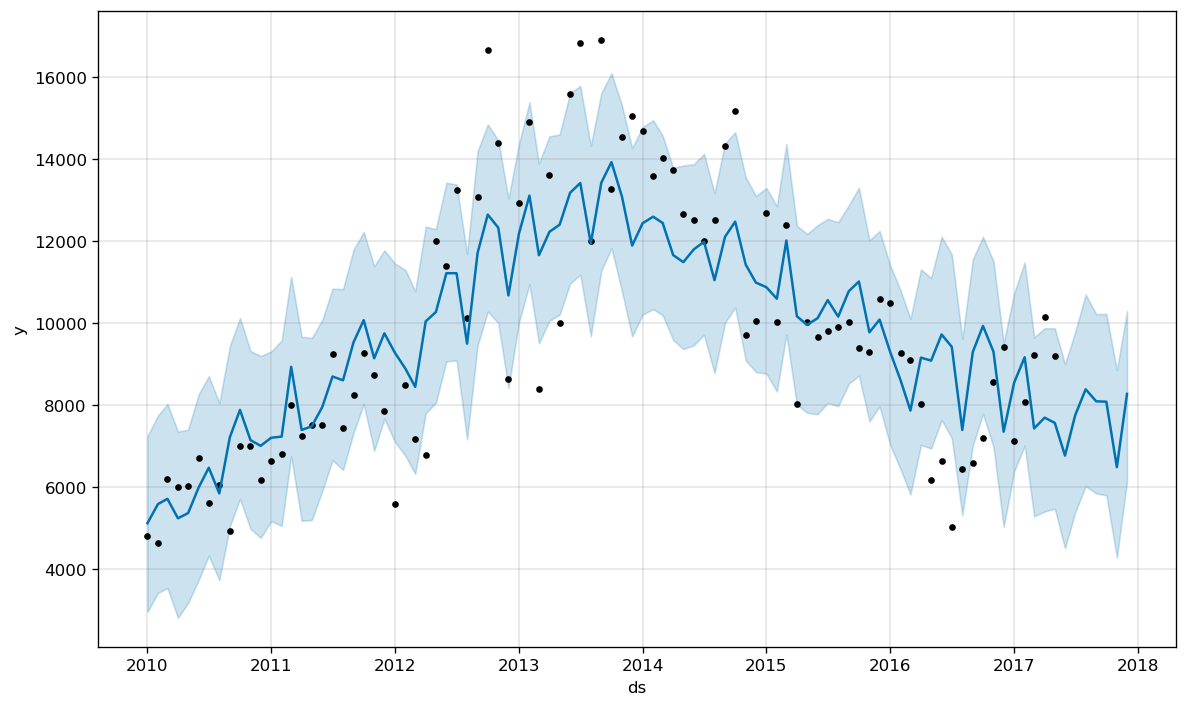

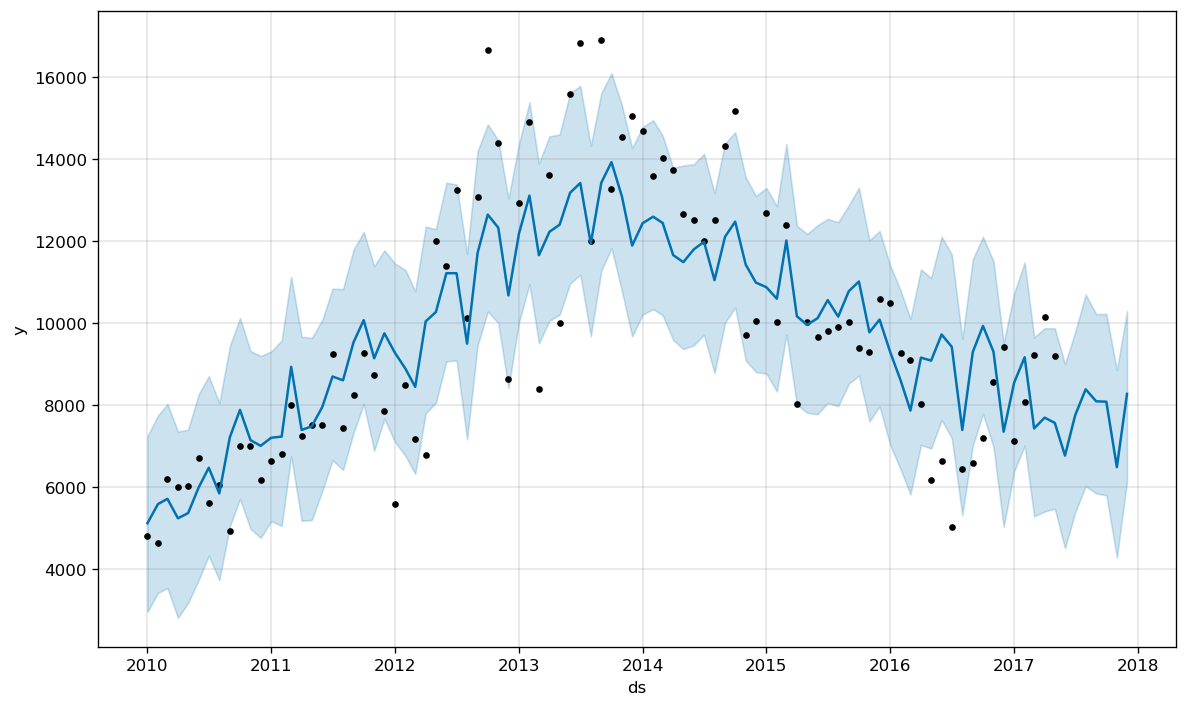

In [62]:
m.plot(forecast)

In [63]:
test.head()

,Periode,Suzuki
0,2010-01-01,4815.0
1,2010-02-01,4638.0
2,2010-03-01,6203.0
3,2010-04-01,6013.0
4,2010-05-01,6043.0


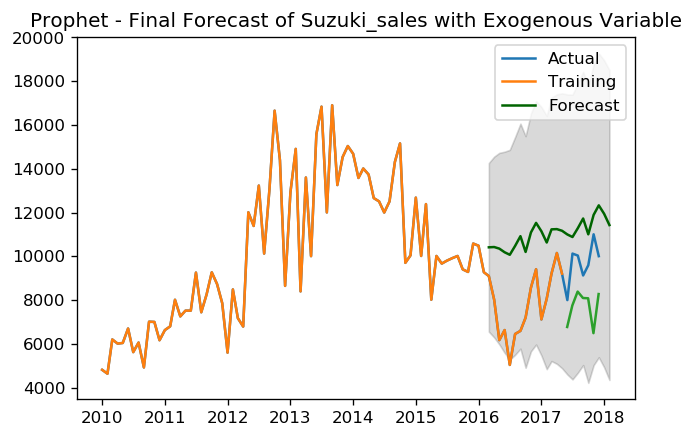

In [64]:
plt.plot(test['Periode'],test['Suzuki'], label = 'Actual')
plt.plot(train_df['ds'],train_df['y'], label ='Training')
plt.plot(forecast['ds'].iloc[-7:],forecast['yhat'].iloc[-7:])
plt.plot(fitted_series, color='darkgreen', label ='Forecast')

plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Prophet - Final Forecast of Suzuki_sales with Exogenous Variable")
plt.show()

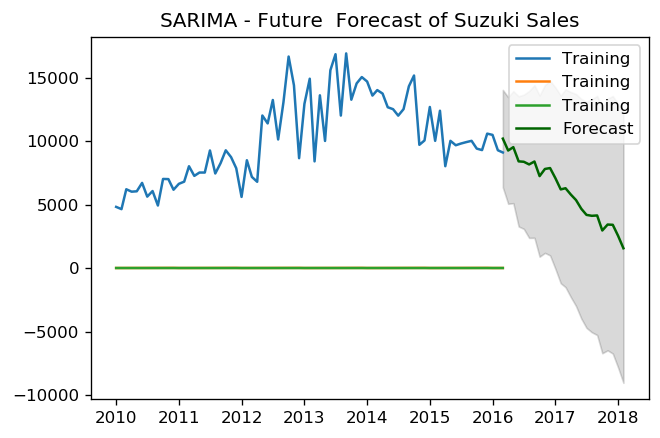

In [65]:
training=dfsuzuki
n_periode=12

fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True) #Return the Confidence Interval
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

plt.plot(train, label ='Training')
plt.plot(fitted_series, color='darkgreen', label ='Forecast')
plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Future  Forecast of Suzuki Sales")
plt.show()

In [66]:
suzuki_predict=pd.DataFrame(fitted_series)
suzuki_predict.columns=['suzuki']

In [67]:
suzuki_predict.to_csv('suzuki_predict.csv')